##  THIS PROJECT INTENDS TO PROVIDE AN INDEPT ANALYSIS OF THE EXIT SURVEY DATA OF THE  DETE (Department of Education, Training and Employment) and the TAFE (Technical and Further Education) institute in Queensland, Australia.  
 ---
The data sets can be found at:
https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey    and

https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey
  



**The analysis intends to provide answers to questions such as:**

1. Are employees who only worked for the institutes for a *short period* of time resigning due to some kind of dissatisfaction?

2. Are *younger employees* resigning due to some kind of dissatisfaction? 
    
3. What about *older employees*, are they exiting due to dissatisfaction as well?

Read in data

In [1]:
import pandas as pd
import numpy as np
import missingno as msno           # this would be used to visualise missing data/NaN Values


dete = pd.read_csv('dete_employee_exit_survey.csv', encoding = 'ANSI')
tafe = pd.read_csv('tafe_employee_exit_survey.csv', encoding = 'ANSI')

In [2]:
tafe.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 – 30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 – 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [3]:
dete.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


'Not Sorted' values in the various columns would be assigned the value 'na' to reduce amiguities in the DETE dataset
This would be implimented by reading the file again and setting the na_values parameter

In [4]:
dete = pd.read_csv('dete_employee_exit_survey.csv', na_values = 'Not Sorted')

Next we'll drop columns that aren't useful for this analysis

In [5]:
dete = dete.drop(dete.columns[28:49], axis=1)
tafe = tafe.drop(tafe.columns[17:66], axis =1)

Visualizing the 'Contributing Factors' columns in the TAFE dataset would assit in getting a trend to follow in the cleaning

In [6]:
pattern = r'[Cc]ontributing'
contributing = tafe.columns[tafe.columns.str.contains(pattern)]
contrib = tafe[contributing]
# msno.bar(contrib)

Refining/Renaming the column names in both datasets

In [7]:
dete.columns = dete.columns.str.lower().str.strip().str.replace(' ', '_').str.replace('/','_or_')

dete.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


### Cleaning the column names in TAFE dataset

In [8]:
tafe.columns = ['id','institute_name','workarea','cease_date','separationtype','cf_move_to_pub','cf_move_to_priv',
                'cf_move_self_employ','cf_health','cf_family','cf_dissatisfaction','cf_job_dissatisfaction','cf_conflict',
                'cf_study','cf_travel','cf_other','cf_none','gender','age','empolyment_type','classification','institute_service',
                'role_service']

The 'separationtype' column values that are 'resignations' would be the target of this analysis.
It's thus important to filter-out columns whose separation types are 'resignation' for both datasets

In [9]:
tafe = tafe[tafe['separationtype'] == 'Resignation'].copy()
dete = dete[dete['separationtype'].str.contains(r'[Rr]esign')].copy()
dete.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994,1997,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009,2009,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997,2008,Teacher Aide,NaN,Not Stated,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009,2009,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


### Preparing the 'institute_service' (years) columns

    The TAFE dataset has a column for this already and does not need cleaning
    In the DETE dataset, we'll extract dates from the cease_date and dete_start_date columns, convert to numeric & subtract

In [10]:
year_pattern = r'(\d{4})'       # extracts only four-digit year string

dete['cease_date'] = dete['cease_date'].str.extract(year_pattern, expand=False)
dete['cease_date'].value_counts(dropna=False)

2013    146
2012    129
2014     22
NaN      11
2010      2
2006      1
Name: cease_date, dtype: int64

In [11]:
# subtraction can rather be done on float/in64 not object dtype
dete['cease_date'] = pd.to_numeric(dete['cease_date'], errors='coerce')
dete['dete_start_date'] = pd.to_numeric(dete['dete_start_date'], errors='coerce')

Generate a column 'institute_service' for the service year duration, this should make the analysis a lot easier

In [12]:
dete.loc[:,'institute_service'] = dete.loc[:,'cease_date'] - dete.loc[:,'dete_start_date']

In [13]:
dete.institute_service = dete.institute_service.fillna(10.00)        # the column average is 10.45

Cleaning the TAFE 'institute_service' column next

In [14]:
tafe['institute_service'].value_counts(dropna=False)

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

In [15]:
i_service_pattern = r'(\d*\d)'
tafe['institute_service'] = tafe['institute_service'].astype(str).str.extract(i_service_pattern)
tafe['institute_service'] = tafe['institute_service'].astype(float)

### Preparing the 'dissatisfied' columns

    This isn't contained in either dataset and would need to be extracted
    
    TAFE would require combining 'cf_dissatisfaction' and 'cf_job_dissatisfaction' columns
    
    DETE would require combining 'job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment', 
                                 'lack_of_recognition','lack_of_job_security', 'work_location', 'employment_conditions',
                                 'relocation', 'work_life_balance', 'workload' columns

Cleaning TAFE first

In [16]:
dissatisfied_pattern = r'[Dd]issatis'               # the regex matches any column word containing 'dissatisfied'

col_name_dissatisfied_bool = tafe.columns.str.contains(dissatisfied_pattern)
dissatisfied = tafe.columns[col_name_dissatisfied_bool]    

In [17]:
def sort_dissatisfied(df):
    if df == '-':
        return False
    elif df == np.nan:
        return False
    else:
        return True

tafe['dissatisfied_1'] = tafe[dissatisfied[0]].apply(sort_dissatisfied)
tafe['dissatisfied_2'] = tafe[dissatisfied[1]].apply(sort_dissatisfied)

Creating a new column that will convert values in the TAFE dataset into True of False values would also assist the final analysis

In [18]:
tafe['dissatisfied'] = tafe.loc[:,['dissatisfied_1','dissatisfied_2']].any(axis=1)

Cleaning the DETE dissatified column next

In [19]:
# the group of columns I considered to be satisfaction-related are made into a list
column_group = ['career_move_to_public_sector','career_move_to_private_sector','interpersonal_conflicts','job_dissatisfaction', 
         'dissatisfaction_with_the_department','physical_work_environment', 'lack_of_recognition','lack_of_job_security', 
         'work_location', 'employment_conditions','maternity_or_family', 'relocation']

dete['dissatisfied'] = dete[column_group].any(axis='columns')

### Cleaning the 'age' columns

Starting with the DETE dataset

In [20]:
dete['age'] = dete.age.astype(str).str.extract(r'(\d{2})',expand=False)
dete['age'] = dete['age'].fillna(dete['age'].astype(float).mean())
dete['age'] = dete['age'].astype(float)
dete['age'].value_counts(dropna=False)

41.000000    48
46.000000    42
36.000000    41
26.000000    35
51.000000    32
21.000000    29
31.000000    29
56.000000    26
61.000000    23
40.212418     5
20.000000     1
Name: age, dtype: int64

Next is the TAFE dataset

In [21]:
tafe['age'] = tafe.age.astype(str).str.extract(r'(\d{2})',expand=False)
#filling the NaN values with the column's average
tafe['age'] = tafe['age'].fillna(tafe['age'].astype(float).mean())
tafe['age'] = tafe['age'].astype(float)
tafe['age'].value_counts(dropna=False)

38.27931    50
41.00000    45
51.00000    39
46.00000    39
21.00000    33
26.00000    32
31.00000    32
36.00000    32
56.00000    29
20.00000     9
Name: age, dtype: int64

It'll be nice to be able to identify each dataframe after they're combined

In [22]:
dete['institute'] = 'DETE'
tafe['institute'] = 'TAFE'

## Combining the dataset

In [23]:
combined_row = pd.concat([tafe, dete], sort=True, axis=0)        # row-wise combination missing values minimizes

In [24]:
combined_row['dissatisfied'].isna().sum()
combined_row.columns

Index(['aboriginal', 'age', 'business_unit', 'career_move_to_private_sector',
       'career_move_to_public_sector', 'cease_date', 'cf_conflict',
       'cf_dissatisfaction', 'cf_family', 'cf_health',
       'cf_job_dissatisfaction', 'cf_move_self_employ', 'cf_move_to_priv',
       'cf_move_to_pub', 'cf_none', 'cf_other', 'cf_study', 'cf_travel',
       'classification', 'dete_start_date', 'disability',
       'dissatisfaction_with_the_department', 'dissatisfied', 'dissatisfied_1',
       'dissatisfied_2', 'employment_conditions', 'employment_status',
       'empolyment_type', 'gender', 'id', 'ill_health', 'institute',
       'institute_name', 'institute_service', 'interpersonal_conflicts',
       'job_dissatisfaction', 'lack_of_job_security', 'lack_of_recognition',
       'maternity_or_family', 'nesb', 'none_of_the_above',
       'physical_work_environment', 'position', 'region', 'relocation',
       'role_service', 'role_start_date', 'separationtype', 'south_sea',
       'study_or_tr

In [25]:
# columns with less than 500 non NA/NaN values are not useful for our analysis
combined = combined_row.dropna(axis=1, thresh=500).copy()
combined.columns

Index(['age', 'cease_date', 'dissatisfied', 'gender', 'id', 'institute',
       'institute_service', 'separationtype'],
      dtype='object')

### Data Categorization

### AGE

**This would be according to the criteria found in this document (with a little  adjustment):**

**https://doi.org/10.1371/journal.pone.0215637**
    1. Teenagers: Less than 21 years
    2. Young Adults: Between 21 and 25
    3. Adults: Between 26 and 40
    4. Middle Aged: Between 41 and 60
    5. Older Adults: Over 60

In [26]:
def age_cat(val):
    if val <= 20:
        return 'Teenagers'
    elif val >= 21 and val <= 25:
        return 'Young Adults'
    elif val >= 26 and val <= 39:
        return 'Adults'
    elif val >= 40 and val <= 59:
        return 'Middle Aged'
    elif val >= 60:
        return 'Older Adults'
    
combined['age'] = combined['age'].apply(age_cat)

In [27]:
combined.age.value_counts(dropna=False)

Middle Aged     305
Adults          251
Young Adults     62
Older Adults     23
Teenagers        10
Name: age, dtype: int64

### Service Year
#### The service years would be grouped according to the following criteria:
    1. New: Less than 3 years at a company
    2. Experienced: 3-6 years at a company
    3. Established: 7-10 years at a company
    4. Veteran: 11 or more years at a company
***This categorization is sourced from:*** https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage

In [28]:
# creating a function that sets the sevice_cat column into these categories.
# Unknown values in this column are not significant in the final analysis and I'd prefer to leave it as it is.

def years_cat(val):
    if val < 3:
        return 'New'
    elif val >= 3 and val <= 6:
        return 'Experienced'
    elif val >= 7 and val <= 10:
        return 'Established'
    elif val >= 11:
        return 'Veteran'
    else:
        return 'Unknown'
    
combined['service_cat'] = combined['institute_service'].apply(years_cat)

In [29]:
combined.service_cat.value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
Established    100
Unknown         50
Name: service_cat, dtype: int64

Visualizing the missing values

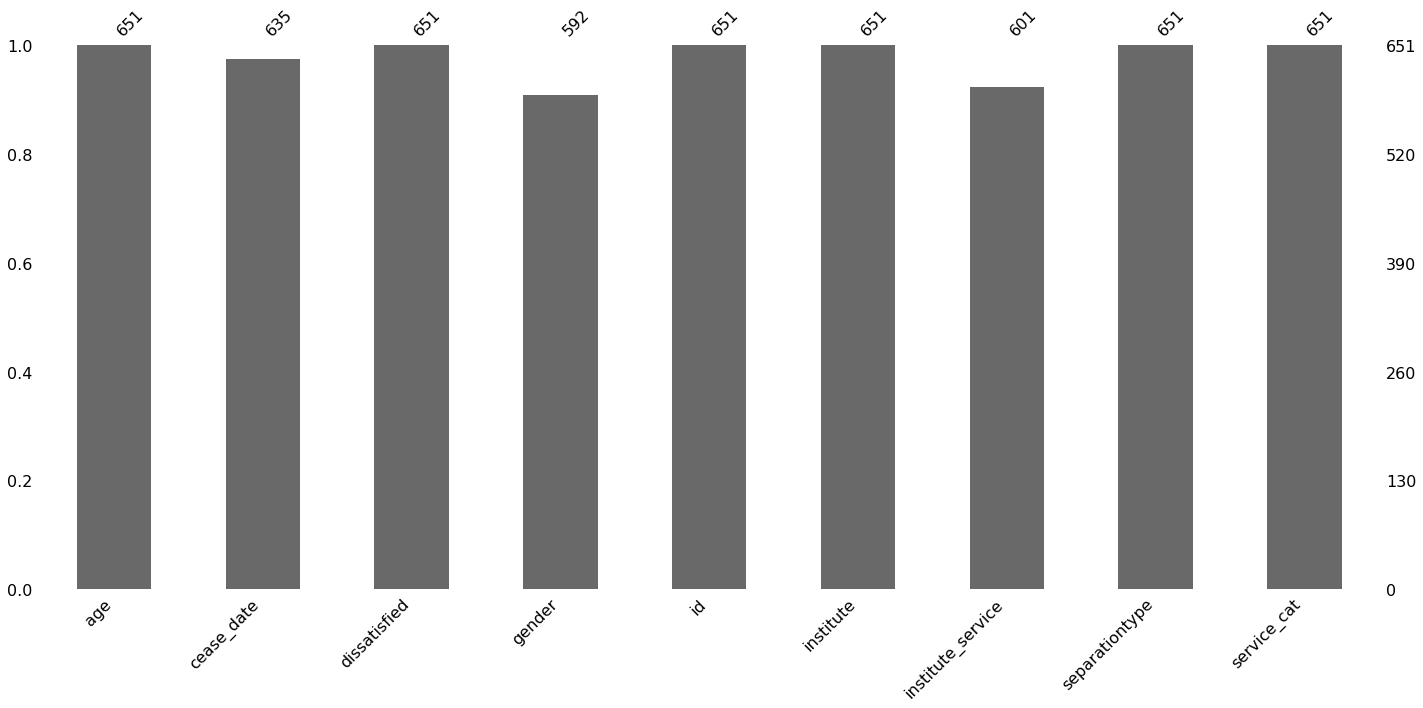

In [30]:
msno.bar(combined)

The data is pretty ready for analysis!

## ANALYSIS

### SERVICE YEARS

In [31]:
# sum of dissatisfied employees in each cat
sy_sum_dissatisfied = pd.pivot_table(combined, index='service_cat', values='dissatisfied', aggfunc=np.sum)
sy_sum_dissatisfied

,dissatisfied
service_cat,
Established,72.0
Experienced,82.0
New,77.0
Unknown,22.0
Veteran,81.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BCDFAC8>],
      dtype=object)

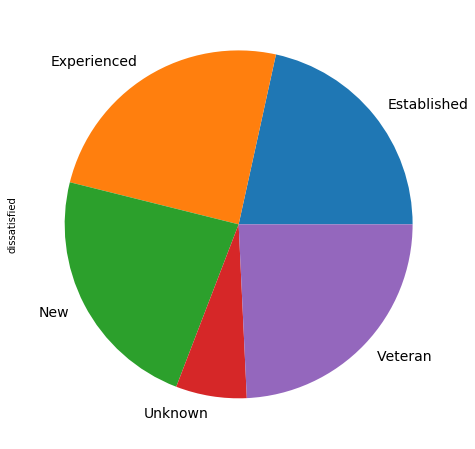

In [32]:
sy_sum_dissatisfied.plot(kind='pie', subplots=True, figsize=(8,8),legend=False, fontsize=14)

### THE AGE FACTOR

In [33]:
# sum of dissatisfied employees in each cat
age_sum_dissatisfied = pd.pivot_table(combined, index='age', values='dissatisfied', aggfunc=np.sum)
age_sum_dissatisfied

,dissatisfied
age,
Adults,132.0
Middle Aged,151.0
Older Adults,16.0
Teenagers,3.0
Young Adults,32.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BF63488>],
      dtype=object)

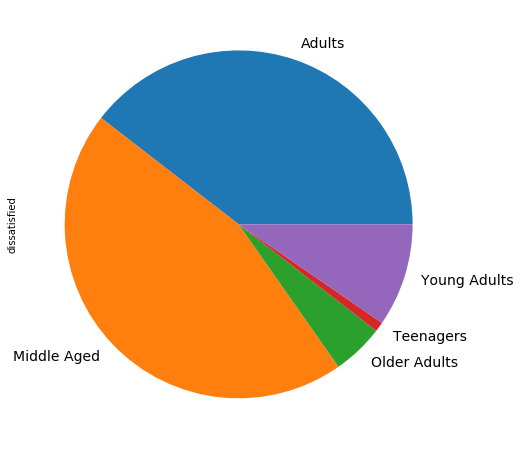

In [34]:
age_sum_dissatisfied.plot(kind='pie', subplots=True, figsize=(8,8),legend=False, fontsize=14)

## Conclusion

Three hundred and thirty four (334) employees' data was cleaned and analysed. The result clearly indicated that:
        
    1. New employees are only third in the list of employees who resigned due to dissatisfaction with 77 individuals.
    -  Those whose service years were unknown are least of those who resigned for same reason
           
           
    2. Younger employees (teenagers) are observed to have satisfaction-related resignations the least. They seem to be very 
       comfortable at the institute.
    - 'Young Adults' too seems to be a lot comfortable as they have the third least satisfaction-related resignations.
       
       
    3. Older Adults (Aged 60+) tendered resignations the least (next to Teenagers). They probably exited due to retirement.
    -  Middles Aged employees resigned the most (with a very wide margin). They are most disstaisfied at the institute.


### Outcome Verification

The outcome of this analysis perfectly conforms with conclusions of:

***F. Bertrand et. al (Le Travail Humain Vol 73, Issue 3,2010, Pages 213 to 237)***